Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
#Exercício 1 - Treinamento do modelo baseado em árvore de decisão
# Passo 1: Passo 1: Passo 1: Carregar o Conjunto de Dados Digits
from sklearn.datasets import load_digits
import numpy as np

# Carregar o dataset digits
digits = load_digits()
X, y = digits.data, digits.target

# Verificar o intervalo atual dos dados
print(f"Valores mínimos e máximos dos pixels: {X.min()}, {X.max()}")

#Passo 2: Pré-processar os Dados para 256 Níveis de Cinza
# Escalar os dados para 256 níveis de cinza
X = (X / X.max()) * 255
X = X.astype(np.uint8)  # Converte para inteiro de 8 bits

# Verificar a nova escala dos dados
print(f"Novos valores mínimos e máximos dos pixels: {X.min()}, {X.max()}")

#Passo 3: Dividir os Dados em Conjunto de Treinamento e Teste
from sklearn.model_selection import train_test_split

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Passo 4: Treinar o Modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar o modelo
tree_clf.fit(X_train, y_train)

# Fazer previsões
y_pred = tree_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

#Passo 5: Ajuste dos Parâmetros
# Testando diferentes profundidades
for depth in [5, 10, 15, 20, None]:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia com profundidade {depth}: {accuracy:.4f}")

Valores mínimos e máximos dos pixels: 0.0, 16.0
Novos valores mínimos e máximos dos pixels: 0, 255
Acurácia do modelo: 0.8500
Acurácia com profundidade 5: 0.6639
Acurácia com profundidade 10: 0.8500
Acurácia com profundidade 15: 0.8417
Acurácia com profundidade 20: 0.8417
Acurácia com profundidade None: 0.8417


In [2]:
#Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble
#Passo 1: Carregar e Pré-processar o Conjunto de Dados digits
from sklearn.datasets import load_digits
import numpy as np

# Carregar o dataset digits
digits = load_digits()
X, y = digits.data, digits.target

# Escalar os dados para 256 níveis de intensidade
X = (X / X.max()) * 255
X = X.astype(np.uint8)  # Converte para inteiros de 8 bits

# Dividir os dados em treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Passo 2: Treinar o Modelo de Árvore de Decisão Simples
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar o modelo
tree_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia do modelo de árvore de decisão: {accuracy_tree:.4f}")

#Passo 3: Treinar o Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Treinar o modelo
rf_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.4f}")

#Passo 4: Treinar o Modelo XGBoost
from xgboost import XGBClassifier

# Criar o modelo XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=10, random_state=42)

# Treinar o modelo
xgb_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = xgb_clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do modelo XGBoost: {accuracy_xgb:.4f}")

#Passo 5: Comparação dos Resultados
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy_tree:.4f}")
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.4f}")
print(f"Acurácia do modelo XGBoost: {accuracy_xgb:.4f}")


Acurácia do modelo de árvore de decisão: 0.8500


Acurácia do modelo Random Forest: 0.9722


/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:24:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia do modelo XGBoost: 0.9694
Acurácia do modelo de Árvore de Decisão: 0.8500
Acurácia do modelo Random Forest: 0.9722
Acurácia do modelo XGBoost: 0.9694


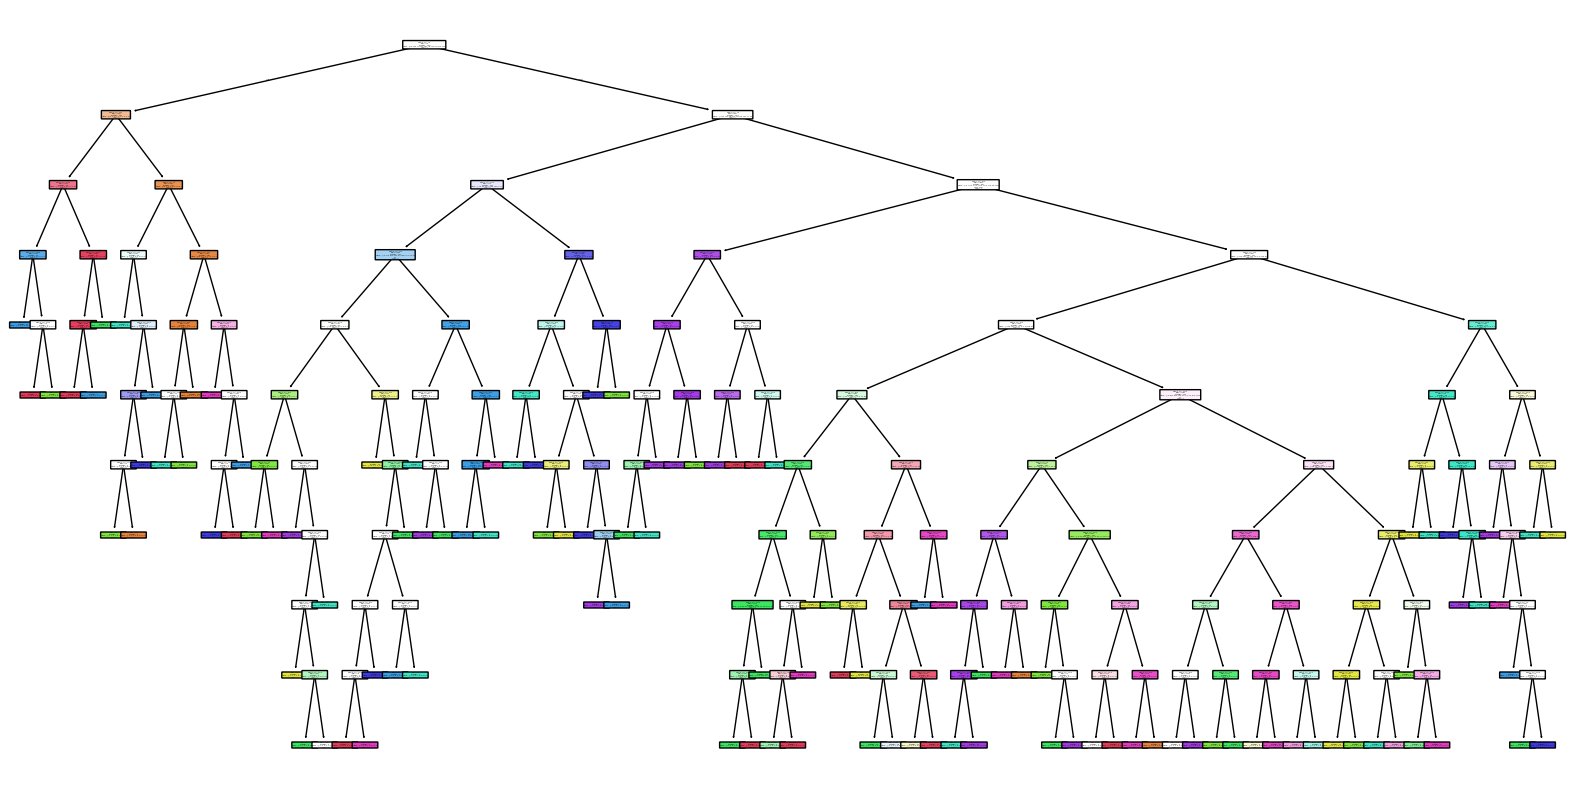

Impureza de Gini no nó raiz: 0.8999
Entropia no nó raiz: 3.3209


In [3]:
#Exercício 3 - Visualização da árvore de decisão e Medida de Impureza
#Passo 1: Visualizar a Árvore de Decisão
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=digits.feature_names, class_names=digits.target_names.astype(str), rounded=True)
plt.show()

#Passo 3: Calcular a Medida de Impureza
# Função para calcular a impureza de Gini
def gini_impurity(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities**2)

# Função para calcular a entropia
def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Exemplo de cálculo de impureza para o nó raiz (todas as classes)
root_gini = gini_impurity(y_train)
root_entropy = entropy(y_train)

print(f"Impureza de Gini no nó raiz: {root_gini:.4f}")
print(f"Entropia no nó raiz: {root_entropy:.4f}")

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Supondo que você já tenha os dados de treino X_train e y_train
decision_tree = DecisionTreeClassifier(max_depth=5)  # Exemplo de configuração
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [12]:
!sudo apt-get install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [13]:
!pip install graphviz pydotplus


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


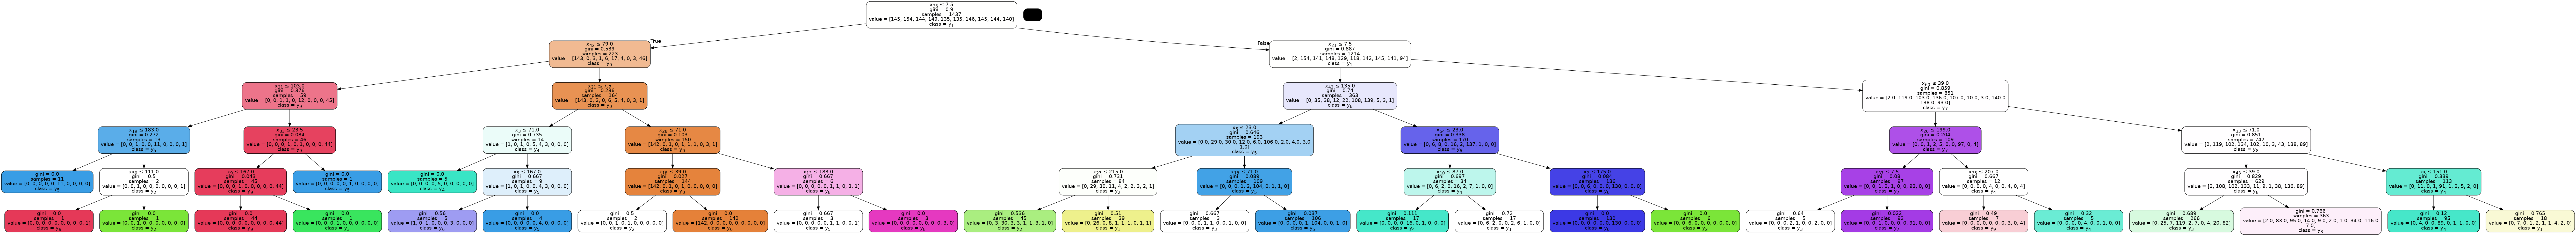

In [14]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Gerar a árvore de decisão em formato DOT
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=None, class_names=True)

# Converter para um gráfico usando pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Exportar a árvore para um arquivo PDF
graph.write_pdf("arvore_decisao.pdf")

# Visualizar a árvore no notebook (opcional)
Image(graph.create_png())

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Carregar o dataset digits
digits = load_digits()
X, y = digits.data, digits.target

# Escalar os dados para 256 níveis de cinza (opcional, dependendo do que você deseja)
X = (X / X.max()) * 255
X = X.astype('uint8')  # Converte para inteiro de 8 bits

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar o modelo
tree_clf.fit(X_train, y_train)

# Fazer previsões para avaliar o modelo
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Salvar o modelo treinado em um arquivo
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(tree_clf, f)

print("Modelo treinado e salvo em 'xgb_model.pkl'")


Acurácia do modelo: 0.8500
Modelo treinado e salvo em 'xgb_model.pkl'


In [2]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import xgboost as xgb
import numpy as np
import pickle
from PIL import Image
import io
import base64

# Criação da instância FastAPI
app = FastAPI()

# Carregamento do Modelo de Machine Learning
def load_model():
    global xgb_model_carregado
    with open("xgb_model.pkl", "rb") as f:
        xgb_model_carregado = pickle.load(f)
    print("Modelo carregado com sucesso")

# Carregar o modelo ao iniciar a aplicação
load_model()

# Definição da classe para receber a imagem em base64
class ImageData(BaseModel):
    image: str

# Definição do endpoint /predict que aceita requisições via POST
@app.post('/predict')
async def predict(data: ImageData):
    try:
        # Receber a imagem em base64 da requisição
        img_bytes = base64.b64decode(data.image)
        
        # Processamento da Imagem
        img = Image.open(io.BytesIO(img_bytes))
        img = img.resize((8, 8))  # Garantir que a imagem seja redimensionada para 8x8 pixels
        img = img.convert('L')  # Converter para escala de cinza
        img_array = np.array(img).reshape(1, -1)  # Reshape para o formato de entrada do modelo (64 características)
        
        # Predição do modelo de Machine Learning
        prediction = xgb_model_carregado.predict(img_array)
        
        # Retornar o resultado da predição como JSON
        return {"prediction": prediction.tolist()}
    except Exception as e:
        print(f"Erro ocorrido durante a predição: {e}")
        raise HTTPException(status_code=500, detail=str(e))

# Executa a aplicação
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)


Modelo carregado com sucesso


RuntimeError: asyncio.run() cannot be called from a running event loop